## Постановка задачи:

Датасет содержит данные о новостных постах онлайн.

От нас требуется ознакомиться с выбранным dataset-ом, визуализировать эти данные, вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.), а также, осуществить "препроцессинг" данных и решить задачу классификации.

Классификацию будем проводить по количеству "расшариваний" новости - популярная она, или нет.


Установливаем библиотеку Pandas:

In [63]:
! pip install pandas

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Импортируем необходимые модули:

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Знакомимся с dataset-ом

Считываем dataset и выводим его содержимое, для наглядности, на экран:

In [65]:
data = pd.read_csv('OnlineNewsPopularity.csv', sep = ', ', header=0, engine = 'python')
data

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


Выводим первые 10 строк dataset-а:

In [66]:
data.head(10)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,...,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,http://mashable.com/2013/01/07/bodymedia-armba...,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,...,0.100000,1.0,-0.224479,-0.500,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731.0,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,...,0.100000,1.0,-0.242778,-0.500,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,http://mashable.com/2013/01/07/car-of-the-futu...,731.0,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,...,0.400000,0.8,-0.125000,-0.125,-0.125000,0.125000,0.000000,0.375000,0.000000,3600
9,http://mashable.com/2013/01/07/chuck-hagel-web...,731.0,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,...,0.100000,0.5,-0.238095,-0.500,-0.100000,0.000000,0.000000,0.500000,0.000000,710


Выводим последние 10 строк dataset-а:

In [67]:
data.tail(10)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
39634,http://mashable.com/2014/12/27/music-grid-outf...,9.0,9.0,251.0,0.666667,1.0,0.786164,21.0,13.0,9.0,...,0.250000,1.00,-0.558333,-1.00,-0.125000,0.000000,0.000000,0.500000,0.000000,1000
39635,http://mashable.com/2014/12/27/nike-marc-newson/,9.0,13.0,478.0,0.514039,1.0,0.641844,18.0,2.0,2.0,...,0.033333,1.00,-0.223611,-0.40,-0.050000,0.100000,0.000000,0.400000,0.000000,1300
39636,http://mashable.com/2014/12/27/north-korea-int...,8.0,8.0,2509.0,0.348878,1.0,0.464923,23.0,1.0,10.0,...,0.100000,1.00,-0.231612,-0.60,-0.050000,0.000000,0.000000,0.500000,0.000000,1700
39637,http://mashable.com/2014/12/27/nypd-rafael-ram...,8.0,13.0,1629.0,0.425711,1.0,0.606092,15.0,12.0,6.0,...,0.033333,1.00,-0.429534,-1.00,-0.050000,0.783333,-0.600000,0.283333,0.600000,1400
39638,http://mashable.com/2014/12/27/protests-contin...,8.0,11.0,223.0,0.653153,1.0,0.825758,5.0,3.0,1.0,...,0.214286,0.80,-0.250000,-0.25,-0.250000,0.000000,0.000000,0.500000,0.000000,1200
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.50,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.40,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.80,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.50,-0.012500,0.000000,0.000000,0.500000,0.000000,1100
39643,http://mashable.com/2014/12/27/youtube-channel...,8.0,10.0,157.0,0.701987,1.0,0.846154,1.0,1.0,0.0,...,0.100000,0.50,-0.200000,-0.20,-0.200000,0.333333,0.250000,0.166667,0.250000,1300


### О наборе данных:

Датасет содержит информацию об опубликованных на новостном сайте материалах, в том числе количество слов, ссылок, картинок, день публикации, некоторые синтетические метрики (доля положительных и отрицательных суждений, нейтральность/полярность заголовка и т. д.), а также количество выполнений пользователями действия "Поделиться" (оно же является значением, предсказание которого является задачей классификации для приведенного датасета).

Авторы:

Kelwin Fernandes (kafc@inesctec.pt, kelwinfc@gmail.com) - INESC TEC, Porto, Portugal/Universidade do Porto, Portugal.
Pedro Vinagre (pedro.vinagre.sousa@gmail.com) - ALGORITMI Research Centre, Universidade do Minho, Portugal
Paulo Cortez - ALGORITMI Research Centre, Universidade do Minho, Portugal
Pedro Sernadela - Universidade de Aveiro
Описание с сайта источника:

The articles were published by Mashable (www.mashable.com) and their content as the rights to reproduce it belongs to them. Hence, this dataset does not share the original content but some statistics associated with it. The original content be publicly accessed and retrieved using the provided urls.
Acquisition date: January 8, 2015
The estimated relative performance values were estimated by the authors using a Random Forest classifier and a rolling windows as assessment method. See their article for more details on how the relative performance values were set.

Number of Attributes: 61 (58 predictive attributes, 2 non-predictive, 1 goal field)

Attribute Information:
0. url: URL of the article (non-predictive)
1. timedelta: Days between the article publication and the dataset acquisition (non-predictive)
2. n_tokens_title: Number of words in the title
3. n_tokens_content: Number of words in the content
4. n_unique_tokens: Rate of unique words in the content
5. n_non_stop_words: Rate of non-stop words in the content
6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content
7. num_hrefs: Number of links
8. num_self_hrefs: Number of links to other articles published by Mashable
9. num_imgs: Number of images
10. num_videos: Number of videos
11. average_token_length: Average length of the words in the content
12. num_keywords: Number of keywords in the metadata
13. data_channel_is_lifestyle: Is data channel 'Lifestyle'?
14. data_channel_is_entertainment: Is data channel 'Entertainment'?
15. data_channel_is_bus: Is data channel 'Business'?
16. data_channel_is_socmed: Is data channel 'Social Media'?
17. data_channel_is_tech: Is data channel 'Tech'?
18. data_channel_is_world: Is data channel 'World'?
19. kw_min_min: Worst keyword (min. shares)
20. kw_max_min: Worst keyword (max. shares)
21. kw_avg_min: Worst keyword (avg. shares)
22. kw_min_max: Best keyword (min. shares)
23. kw_max_max: Best keyword (max. shares)
24. kw_avg_max: Best keyword (avg. shares)
25. kw_min_avg: Avg. keyword (min. shares)
26. kw_max_avg: Avg. keyword (max. shares)
27. kw_avg_avg: Avg. keyword (avg. shares)
28. self_reference_min_shares: Min. shares of referenced articles in Mashable
29. self_reference_max_shares: Max. shares of referenced articles in Mashable
30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable
31. weekday_is_monday: Was the article published on a Monday?
32. weekday_is_tuesday: Was the article published on a Tuesday?
33. weekday_is_wednesday: Was the article published on a Wednesday?
34. weekday_is_thursday: Was the article published on a Thursday?
35. weekday_is_friday: Was the article published on a Friday?
36. weekday_is_saturday: Was the article published on a Saturday?
37. weekday_is_sunday: Was the article published on a Sunday?
38. is_weekend: Was the article published on the weekend?
39. LDA_00: Closeness to LDA topic 0
40. LDA_01: Closeness to LDA topic 1
41. LDA_02: Closeness to LDA topic 2
42. LDA_03: Closeness to LDA topic 3
43. LDA_04: Closeness to LDA topic 4
44. global_subjectivity: Text subjectivity
45. global_sentiment_polarity: Text sentiment polarity
46. global_rate_positive_words: Rate of positive words in the content
47. global_rate_negative_words: Rate of negative words in the content
48. rate_positive_words: Rate of positive words among non-neutral tokens
49. rate_negative_words: Rate of negative words among non-neutral tokens
50. avg_positive_polarity: Avg. polarity of positive words
51. min_positive_polarity: Min. polarity of positive words
52. max_positive_polarity: Max. polarity of positive words
53. avg_negative_polarity: Avg. polarity of negative words
54. min_negative_polarity: Min. polarity of negative words
55. max_negative_polarity: Max. polarity of negative words
56. title_subjectivity: Title subjectivity
57. title_sentiment_polarity: Title polarity
58. abs_title_subjectivity: Absolute subjectivity level
59. abs_title_sentiment_polarity: Absolute polarity level
60. shares: Number of shares (target)

Выведем описательную статистику по нашему dataset-у:

In [68]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [69]:
data.describe(include = ['object'])

,url
count,39644
unique,39644
top,http://mashable.com/2013/01/07/amazon-instant-...
freq,1


In [70]:
data.describe(include = 'all')

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
unique,39644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,http://mashable.com/2013/01/07/amazon-instant-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,NaN,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,NaN,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,NaN,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,NaN,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,NaN,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000


Выведем матрицу графиков рессеивания (запускать на свой стах и риск):

In [71]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(data, alpha = .01, figsize = (10, 10))
#pass

Можно вычислить матрицу корреляции, чтобы выявить возможные связи признаков между собой (а вернее, их отсутствие - ввиду тематики датасета большинство признаков являются совершенно независимыми "по определению").

In [72]:
data.corr()

C:\Users\Nick\AppData\Local\Temp\ipykernel_24740\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
timedelta,1.000000,-0.240320,-0.062867,0.002866,0.000089,0.003805,-0.000832,0.064530,-0.027636,0.000936,...,0.054772,0.098288,-0.000507,0.062175,-0.063239,-0.015919,0.038711,0.011551,-0.002745,0.008662
n_tokens_title,-0.240320,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,...,-0.025069,-0.021662,-0.017096,-0.029146,0.011425,0.077245,0.000240,-0.146954,0.040550,0.008783
n_tokens_content,-0.062867,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,...,-0.261493,0.415706,-0.130375,-0.450603,0.225870,0.004484,0.023358,0.007136,0.013439,0.002459
n_unique_tokens,0.002866,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,...,0.009193,-0.009054,0.001453,0.009902,-0.007315,-0.004678,-0.002333,-0.009242,-0.004217,0.000806
n_non_stop_words,0.000089,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,...,0.000904,0.002062,-0.001372,-0.001214,-0.000761,-0.005389,-0.001650,-0.008511,-0.004391,0.000443
n_non_stop_unique_tokens,0.003805,-0.005420,0.000373,0.999852,0.999532,1.000000,-0.004983,0.007584,0.014230,-0.000963,...,0.008380,-0.002245,-0.001972,0.004318,-0.006708,-0.005860,-0.002910,-0.008572,-0.005342,0.000114
num_hrefs,-0.000832,-0.053496,0.423065,-0.004352,0.005521,-0.004983,1.000000,0.396452,0.342633,0.114518,...,-0.082168,0.286733,-0.152146,-0.263576,0.054948,0.043950,0.039041,0.009443,0.056525,0.045404
num_self_hrefs,0.064530,-0.014856,0.304682,0.006620,0.013598,0.007584,0.396452,1.000000,0.238586,0.077458,...,-0.072648,0.189922,-0.058222,-0.122071,0.039153,-0.011239,0.026224,0.008961,-0.006709,-0.001900
num_imgs,-0.027636,-0.008858,0.342600,0.018802,0.028486,0.014230,0.342633,0.238586,1.000000,-0.067336,...,-0.024683,0.155232,-0.072500,-0.136522,0.042644,0.056815,0.046310,-0.013759,0.063307,0.039388
num_videos,0.000936,0.051460,0.103699,-0.000597,-0.000899,-0.000963,0.114518,0.077458,-0.067336,1.000000,...,-0.010103,0.125659,-0.115976,-0.138190,0.027251,0.061028,0.021980,-0.021982,0.055231,0.023936


Визуализируем данную матрицу корреляции:

In [73]:
import sys
!{sys.executable} -m pip install seaborn
import seaborn as sns

"c:\Program" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


C:\Users\Nick\AppData\Local\Temp\ipykernel_24740\4293635737.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = data.corr()


<AxesSubplot: >

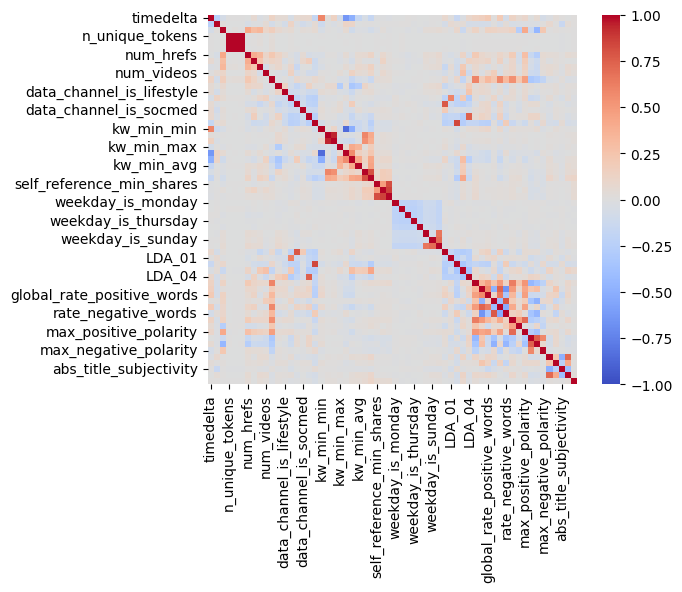

In [74]:
corr_mat = data.corr()
sns.heatmap(corr_mat, square=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')

Как и следовало ожидать, признаки практически не коррелируют друг с другом.

In [75]:
corr_mat.where(np.triu(corr_mat > 0.4, k=1)).stack().sort_values(ascending=False)

n_unique_tokens                n_non_stop_unique_tokens        0.999852
                               n_non_stop_words                0.999572
n_non_stop_words               n_non_stop_unique_tokens        0.999532
kw_max_min                     kw_avg_min                      0.940529
self_reference_max_shares      self_reference_avg_sharess      0.853480
data_channel_is_world          LDA_02                          0.836618
self_reference_min_shares      self_reference_avg_sharess      0.818907
kw_max_avg                     kw_avg_avg                      0.811864
global_rate_negative_words     rate_negative_words             0.779556
data_channel_is_bus            LDA_00                          0.774651
data_channel_is_tech           LDA_04                          0.749737
avg_negative_polarity          min_negative_polarity           0.748896
global_sentiment_polarity      rate_positive_words             0.727827
title_subjectivity             abs_title_sentiment_polarity    0

Введем категориальный признак data_channel, содержащий тематику статьи (lifestyle, entertainment, bus, socmed, tech, world), для повышения наглядности визуализации.

In [76]:
data["data_channel"] = data.apply(lambda row: "lifestyle" if row["data_channel_is_lifestyle"] else
                                                      "entertainment" if row["data_channel_is_entertainment"] else
                                                      "bus" if row["data_channel_is_bus"] else
                                                      "socmed" if row["data_channel_is_socmed"] else
                                                      "tech" if row["data_channel_is_tech"] else
                                                      "world" if row["data_channel_is_world"] else
                                                      "other", axis=1)
data["data_channel"] = data["data_channel"].astype("category")
data["data_channel"].value_counts()

world            8427
tech             7346
entertainment    7057
bus              6258
other            6134
socmed           2323
lifestyle        2099
Name: data_channel, dtype: int64

Введенный категориальный признак data_channel принимает 7 различных значений, самое часто встречающееся - world.

In [77]:
data.describe(include=["category"])

,data_channel
count,39644
unique,7
top,world
freq,8427


Оставим только наиболее "интересные" столбцы.

In [78]:
columns = ["n_tokens_title", "n_tokens_content", "num_hrefs", "num_imgs", "num_videos", "is_weekend", "global_rate_positive_words", "global_rate_negative_words", "global_subjectivity", "global_sentiment_polarity", "data_channel", "shares"]
data = data.loc[:, columns]

In [79]:
# random_subset = np.random.choice(np.arange(data.shape[0]), size=500, replace=False)
# sns.pairplot(data.iloc[random_subset], hue="data_channel", diag_kind="hist")
# pass

## Готовим данные

In [80]:
data.head(1).columns

Index(['n_tokens_title', 'n_tokens_content', 'num_hrefs', 'num_imgs',
       'num_videos', 'is_weekend', 'global_rate_positive_words',
       'global_rate_negative_words', 'global_subjectivity',
       'global_sentiment_polarity', 'data_channel', 'shares'],
      dtype='object')

Изменим признак shares таким образом, чтобы он был пригоден для задачи классификации. Для этого введем новый признак shares_discr, имеющий два класса 0 и 1: пусть он равен 0, если соответствующее значение shares не превышает 5000, и 1 в противном случае.

<AxesSubplot: xlabel='shares', ylabel='count'>

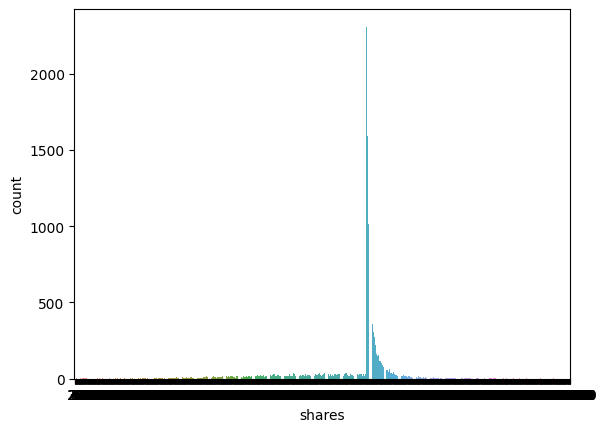

In [81]:
# data = pd.read_csv('OnlineNewsPopularity.csv', sep = ', ', header=0, engine = 'python')
sns.countplot(x='shares',data=data)

In [83]:
data["shares_discr"] = np.where(data["shares"] >= data['shares'].mean(), 1, 0)
data["shares_discr"].value_counts()

0    31565
1     8079
Name: shares_discr, dtype: int64

<AxesSubplot: xlabel='shares_discr', ylabel='count'>

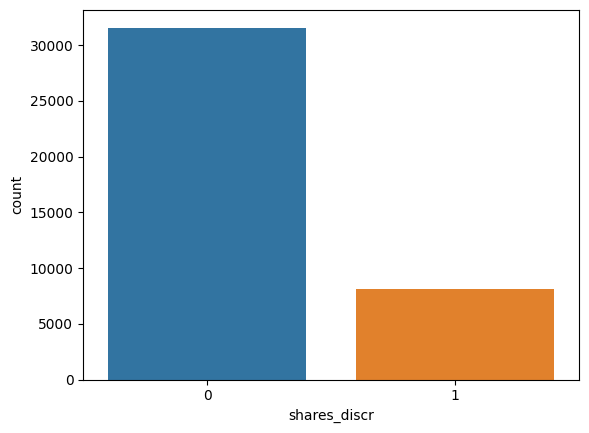

In [53]:
sns.countplot(x='shares_discr',data=data)

Наблюдается значительная неравномерность в распределении классов

В целях повышения наглядности визуализации намеренно были введены категориальные признаки. Теперь от них можно избавиться путем ввода бинарных признаков для каждой из категорий.

In [84]:
data = data.drop('shares', axis=1)
data = pd.get_dummies(data)

In [85]:
data

,n_tokens_title,n_tokens_content,num_hrefs,num_imgs,num_videos,is_weekend,global_rate_positive_words,global_rate_negative_words,global_subjectivity,global_sentiment_polarity,shares_discr,data_channel_bus,data_channel_entertainment,data_channel_lifestyle,data_channel_other,data_channel_socmed,data_channel_tech,data_channel_world
0,12.0,219.0,4.0,1.0,0.0,0.0,0.045662,0.013699,0.521617,0.092562,0,0,1,0,0,0,0,0
1,9.0,255.0,3.0,1.0,0.0,0.0,0.043137,0.015686,0.341246,0.148948,0,1,0,0,0,0,0,0
2,9.0,211.0,3.0,1.0,0.0,0.0,0.056872,0.009479,0.702222,0.323333,0,1,0,0,0,0,0,0
3,9.0,531.0,9.0,1.0,0.0,0.0,0.041431,0.020716,0.429850,0.100705,0,0,1,0,0,0,0,0
4,13.0,1072.0,19.0,20.0,0.0,0.0,0.074627,0.012127,0.513502,0.281003,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,9.0,1.0,1.0,0.0,0.037572,0.014451,0.482679,0.141964,0,0,0,0,0,0,1,0
39640,12.0,328.0,9.0,3.0,48.0,0.0,0.039634,0.009146,0.564374,0.194249,0,0,0,0,0,1,0,0
39641,10.0,442.0,24.0,12.0,1.0,0.0,0.033937,0.024887,0.510296,0.024609,0,0,0,0,1,0,0,0
39642,6.0,682.0,10.0,1.0,0.0,0.0,0.020528,0.023460,0.358578,-0.008066,0,0,0,0,0,0,0,1


Нормализация числовых признаков выполняется путем линейного преобразования диапазона каждого из значений к отрезку [0; 1].

In [86]:
data = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))
data.describe()

,n_tokens_title,n_tokens_content,num_hrefs,num_imgs,num_videos,is_weekend,global_rate_positive_words,global_rate_negative_words,global_subjectivity,global_sentiment_polarity,shares_discr,data_channel_bus,data_channel_entertainment,data_channel_lifestyle,data_channel_other,data_channel_socmed,data_channel_tech,data_channel_world
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,0.399940,0.064493,0.035802,0.035501,0.013735,0.130915,0.254842,0.089828,0.443370,0.457439,0.203789,0.157855,0.178009,0.052946,0.154727,0.058597,0.185299,0.212567
std,0.100668,0.055594,0.037276,0.064917,0.045141,0.337312,0.112090,0.058550,0.116685,0.086422,0.402819,0.364610,0.382525,0.223929,0.361649,0.234871,0.388545,0.409129
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.029030,0.013158,0.007812,0.000000,0.000000,0.182550,0.051994,0.396167,0.402560,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.380952,0.048265,0.026316,0.007812,0.000000,0.000000,0.250970,0.082936,0.453457,0.457267,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.476190,0.084494,0.046053,0.031250,0.010989,0.000000,0.323365,0.117552,0.508333,0.509617,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Разбиваем наши данные на y и x:

In [87]:
X = data.drop(['shares_discr'], axis = 1)
y = data['shares_discr']
feature_names = X.columns
print(feature_names)

Index(['n_tokens_title', 'n_tokens_content', 'num_hrefs', 'num_imgs',
       'num_videos', 'is_weekend', 'global_rate_positive_words',
       'global_rate_negative_words', 'global_subjectivity',
       'global_sentiment_polarity', 'data_channel_bus',
       'data_channel_entertainment', 'data_channel_lifestyle',
       'data_channel_other', 'data_channel_socmed', 'data_channel_tech',
       'data_channel_world'],
      dtype='object')


In [88]:
X=X.to_numpy()
y=y.to_numpy()

In [89]:
print(X, end="\n\n")
print(y, end="\n\n")
print(X.shape, end="\n\n")
print(y.shape, end="\n\n")
N, d = X.shape

[[0.47619048 0.02584376 0.01315789 ... 0.         0.         0.        ]
 [0.33333333 0.03009205 0.00986842 ... 0.         0.         0.        ]
 [0.33333333 0.02489969 0.00986842 ... 0.         0.         0.        ]
 ...
 [0.38095238 0.05215955 0.07894737 ... 0.         0.         0.        ]
 [0.19047619 0.08048147 0.03289474 ... 0.         0.         1.        ]
 [0.38095238 0.01852726 0.00328947 ... 0.         0.         0.        ]]

[0. 0. 0. ... 0. 0. 0.]

(39644, 17)

(39644,)



In [90]:
y[:100]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.])

Разделим наш dataset на обучающую и тестовую выборку:

In [ ]:
import sys
! pip install scikit-learn

"c:\Program" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

N_train, _ = x_train.shape 
N_test,  _ = x_test.shape 

N2_train = y_train.shape 
N2_test = y_test.shape 

print(N_train, N_test, N2_train, N2_test)

27750 11894 (27750,) (11894,)


In [92]:
print(np.argwhere(np.isnan(x_train)))
for i, j in np.argwhere(np.isnan(x_train)):
    x_train[i][j] = x_train[0][j]

print(np.argwhere(np.isnan(x_test)))
for i, j in np.argwhere(np.isnan(x_test)):
    x_test[i][j] = x_test[0][j]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

[]
[]
(27750, 17)
(27750,)
(11894, 17)
(11894,)


Интерпретируем все значения `y` как целые числа:

In [93]:
y_test = y_test.astype("int")
y_train = y_train.astype("int")

In [94]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

rus = RandomUnderSampler()
x_train, y_train = rus.fit_resample(x_train, y_train)

## Обучение

Попробуем обучить нашу модель с помощью метода `kNN`:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_test_predict = knn.predict(x_test)
y_train_predict = knn.predict(x_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

In [ ]:
print(f"{err_train}")
print(f"{err_test}")

0.3371837183718372
0.33512695476710946


Улучшить этот результат не получилось.

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_train_predict), end="\n\n")
print(confusion_matrix(y_test, y_test_predict), end="\n\n")

[[24048    66]
 [ 3560    76]]

[[10304    46]
 [ 1527    17]]



In [ ]:
#from sklearn.model_selection import GridSearchCV
#nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
#knn = KNeighborsClassifier()
#grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
#grid.fit(x_train, y_train)

#best_cv_err = 1 - grid.best_score_
#best_n_neighbors = grid.best_estimator_.n_neighbors
#print(best_cv_err, best_n_neighbors)

## Другие алгоритмы обучения:

### SVC (работает очень, очень медленно):

In [ ]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(x_train, y_train)

err_train = np.mean(y_train != svc.predict(x_train))
err_test  = np.mean(y_test  != svc.predict(x_test))

print(f"{err_train}")
print(f"{err_test}")

0.13102702702702704
0.12981335126954768


### Random Forest:

In [ ]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(x_train, y_train)

err_train = np.mean(y_train != rf.predict(x_train))
err_test  = np.mean(y_test  != rf.predict(x_test))

print(f"{err_train}")
print(f"{err_test}")

0.0033873873873873873
0.13183117538254582


### Extremely Randomized Trees:

In [ ]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(x_train, y_train)

err_train = np.mean(y_train != ert.predict(x_train))
err_test  = np.mean(y_test  != ert.predict(x_test))

print(f"{err_train}")
print(f"{err_test}")

0.0033873873873873873
0.13275601143433663


### AdaBoost (работает очень медленно):

In [ ]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(x_train, y_train)

err_train = np.mean(y_train != ada.predict(x_train))
err_test = np.mean(y_test != ada.predict(x_test))

print(f"{err_train}")
print(f"{err_test}")

0.12911711711711713
0.13107449134017152


### GBT (работает очень, очень медленно):

In [ ]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(x_train, y_train)

err_train = np.mean(y_train != gbt.predict(x_train))
err_test = np.mean(y_test != gbt.predict(x_test))

print(f"{err_train}")
print(f"{err_test}")

0.11437837837837837
0.13452160753321002


Наилуший результат показывает SVC и AdaBoost. Ошибка на тестовой выборке составляет ~ 0.129. На обучение алгоритмом SVC затрачивается немного меньше вермени.

Во всех случаях ошибка на тестовой выборке оказывалась больше, чем на тренировочной, что может свидетельствовать о некотором переобучении модели.

Подводя итог, можно сделать вывод, что "предобработка" данных была выполнена успешно и задача классификации решена.


## Домашнее задание 5

In [ ]:
! pip install imblearn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [95]:
from sklearn.neural_network import MLPClassifier

In [96]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,),
                          solver = 'sgd',
                          activation = 'logistic',
                          random_state = 78,
                          max_iter=1000)

In [97]:
%%time
mlp_model.fit(x_train, y_train)

CPU times: total: 46.6 s
Wall time: 37.2 s


MLPClassifier(activation='logistic', max_iter=1000, random_state=78,
              solver='sgd')

In [98]:
mlp_model.predict(x_test)

array([1, 1, 1, ..., 0, 1, 1])

In [99]:
y_train_pred = mlp_model.predict(x_train)
y_test_pred = mlp_model.predict(x_test)


In [100]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.3973040085136573 0.41609214730116023


In [101]:
from sklearn.metrics import accuracy_score

### Нейронная сеть с одним скрытым слоем на 100 элементов, подбор параметра alpha

In [132]:
alpha_arr = np.logspace(-3, 2, 10)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'adam',
                              activation = 'relu',
                              max_iter=1000,
                              random_state = 1)
    mlp_model.fit(x_train, y_train)

    y_train_pred = mlp_model.predict(x_train)
    y_test_pred = mlp_model.predict(x_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

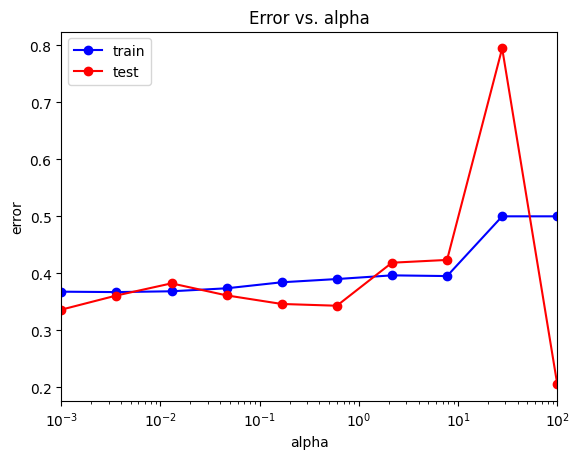

In [133]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

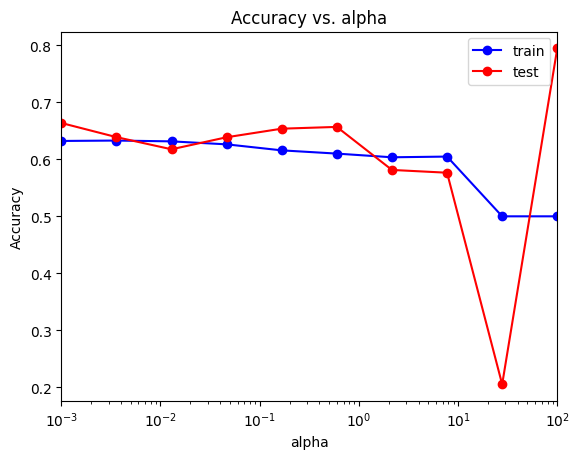

In [135]:
plt.semilogx(alpha_arr, train_acc, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

In [136]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.36706278822277405 0.20522952749285353


In [137]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[100.]


In [141]:
mlp_model = MLPClassifier(alpha = alpha_opt[0], hidden_layer_sizes = (100,),
                          solver = 'sgd', activation = 'logistic', random_state = 42)
mlp_model.fit(x_train, y_train)

y_train_pred = mlp_model.predict(x_train)
y_test_pred = mlp_model.predict(x_test)
print(y_train != y_train_pred)
print(np.mean(y_test != y_test_pred))

[ True  True  True ... False False False]
0.7947704725071465


*Выводы:* Наилучший результат достигается при alpha = 3.16227766. Ошибка на тестовых данных равна ~0.23-0.24, ошибка на тренировочных данных - ~0.23. При меньшем alpha наблюдается понижение ошибки на тренировочных данных и повышение на тестовых, что свидетельствует о переобучении.

In [108]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[9453 2441]
 [   0    0]]


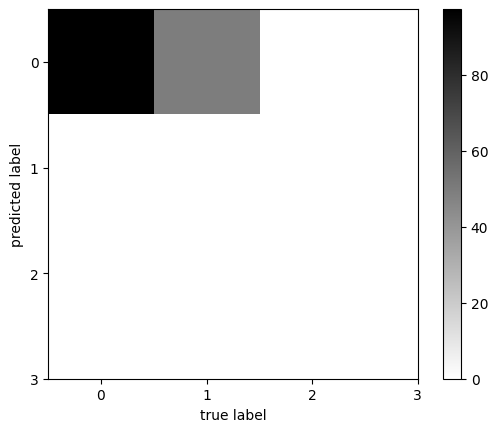

In [109]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(4))
plt.yticks(range(4))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

In [110]:
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [111]:
# plot_confusion_matrix(mlp_model, x_test, y_test) 

In [112]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.89      9453
           1       0.00      0.00      0.00      2441

    accuracy                           0.79     11894
   macro avg       0.40      0.50      0.44     11894
weighted avg       0.63      0.79      0.70     11894



C:\Users\Nick\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nick\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nick\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Нейронная сеть с двумя скрытыми слоями на 50 элементов каждый

In [126]:
mlp_model = MLPClassifier(hidden_layer_sizes = (50, 50), 
                          solver = 'sgd', activation = 'logistic', max_iter=1000, random_state = 42)
mlp_model.fit(x_train, y_train)

y_train_pred = mlp_model.predict(x_train)
y_test_pred = mlp_model.predict(x_test)

print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.5
0.20522952749285353


*Выводы:* наблюдается маленькая ошибка (\~0.04) на тренировочных данных и большая ошибка на тестовых данных (\~0.3), что свидетельствует о переобучении. Попробуем подобрать меньшее количество нейронов на каждом слое:

In [ ]:
i_ans = -1
j_ans = -1
y_train_ans = 100500
y_test_ans = 100500

for i in [5, 10, 15, 20, 25]:
    for j in [5, 10, 15, 20, 25]:
        mlp_model = MLPClassifier(hidden_layer_sizes = (i, j), 
                                  solver = 'sgd', activation = 'logistic', max_iter=1000, random_state = 42)
        mlp_model.fit(x_train, y_train)

        y_train_pred = mlp_model.predict(x_train)
        y_test_pred = mlp_model.predict(x_test)
        print(i, j, ':')
        print(np.mean(y_train != y_train_pred))
        print(np.mean(y_test != y_test_pred))
        if np.mean(y_test != y_test_pred) < y_test_ans:
            i_ans       = i
            j_ans       = j
            y_train_ans = np.mean(y_train != y_train_pred)
            y_test_ans  = np.mean(y_test != y_test_pred)
        print('------')
print("best:", i_ans, j_ans, y_train_ans, y_test_ans)

5 5 :
0.5459295929592959
0.4331595762569363
------
5 10 :
0.48473597359735976
0.6051790818900286
------
5 15 :
0.5638063806380638
0.6861442744240793
------
5 20 :
0.5004125412541254
0.7529006221624348
------
5 25 :
0.49271177117711773
0.15058012443248697
------
10 5 :
0.45187018701870185
0.48755675130317805
------
10 10 :
0.4251925192519252
0.5267361694972255
------
10 15 :
0.517051705170517
0.6842105263157895
------
10 20 :
0.4591584158415842
0.6335967714814192
------
10 25 :
0.4355060506050605
0.5201782411299815
------
15 5 :
0.5127887788778878
0.4920968555574239
------
15 10 :
0.5288778877887789
0.3145283336135867
------
15 15 :
0.5130638063806381
0.294938624516563
------
15 20 :
0.5346534653465347
0.6844627543299142
------
15 25 :
0.48817381738173815
0.4790650748276442
------
20 5 :
0.5485423542354235
0.3104926853875904
------
20 10 :
0.518014301430143
0.6592399529174373
------
20 15 :
0.4837733773377338
0.3596771481419203
------
20 20 :
0.4568206820682068
0.32629897427274257
-----

Наилучшие результаты на двухслойной нейронной сети по ошибке на тестовой выборке получились при двух слоях на 25 нейронов каждый. Ошибка на тренировочной выборке ~= 0.49, на тестовой выборке ~0.15. Попробуем для такой нейронной сети подобрать оптимальное значение alpha.

In [2]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (5, 25), 
                              solver = 'sgd', activation = 'logistic', max_iter=1000, random_state = 42)
    mlp_model.fit(x_train, y_train)

    y_train_pred = mlp_model.predict(x_train)
    y_test_pred = mlp_model.predict(x_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

NameError: name 'np' is not defined

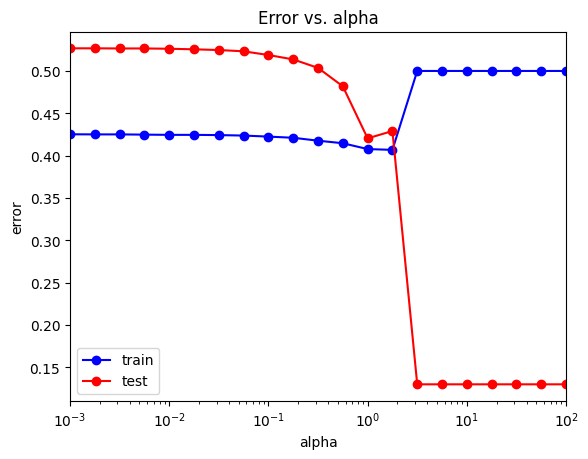

In [ ]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

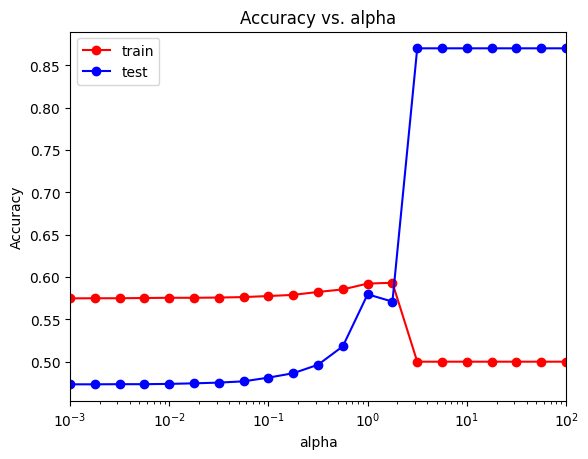

In [ ]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.4067656765676568 0.12981335126954768


В самом лучшем случае ошибка на тестовой выборке не снижается ниже 0.12, а значение accuracy не поднимается выше 0.88.

### Нейронная сеть с одним скрытым слоем, подбор числа нейронов и оптимального alpha

In [ ]:
num_elems_arr = [x for x in range(10, 101, 10)]
alpha_arr = np.logspace(-3, 2, 11)
test_err = []
train_err = []
train_acc = []
test_acc = []

alpha_opts = []
min_test_errors = []
min_train_errors = []
min_test_accuracy = []
min_train_accuracy = []

for index, num_elems in enumerate(num_elems_arr):
    test_err.append(np.array([]))
    train_err.append(np.array([]))
    train_acc.append(np.array([]))
    test_acc.append(np.array([]))
    for alpha in alpha_arr:
        mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (num_elems,), 
                              solver = 'sgd', activation = 'logistic', max_iter=1000, random_state = 42)
        mlp_model.fit(x_train, y_train)
        y_train_pred = mlp_model.predict(x_train)
        y_test_pred = mlp_model.predict(x_test)
        train_err[index] = np.append(train_err[index], np.mean(y_train != y_train_pred))
        test_err[index] = np.append(test_err[index], np.mean(y_test != y_test_pred))
        train_acc[index] = np.append(train_acc[index], accuracy_score(y_train, y_train_pred))
        test_acc[index] = np.append(test_acc[index], accuracy_score(y_test, y_test_pred))
    min_test_err = np.min(test_err[index])
    alpha_opts.append(alpha_arr[test_err[index] == min_test_err])
    min_test_errors.append(min_test_err)
    tmp = test_err[index] == min_test_err
    min_train_errors.append(train_err[index][test_err[index] == min_test_err][0])
    min_test_accuracy.append(test_acc[index][test_err[index] == min_test_err][0])
    min_train_accuracy.append(train_acc[index][test_err[index] == min_test_err][0])

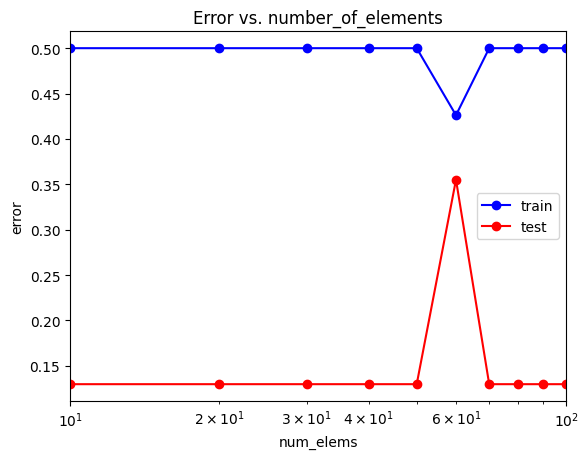

In [ ]:
plt.semilogx(num_elems_arr, min_train_errors, 'b-o', label = 'train')
plt.semilogx(num_elems_arr, min_test_errors, 'r-o', label = 'test')
plt.xlim([np.min(num_elems_arr), np.max(num_elems_arr)])
plt.title('Error vs. number_of_elements')
plt.xlabel('num_elems')
plt.ylabel('error')
plt.legend()

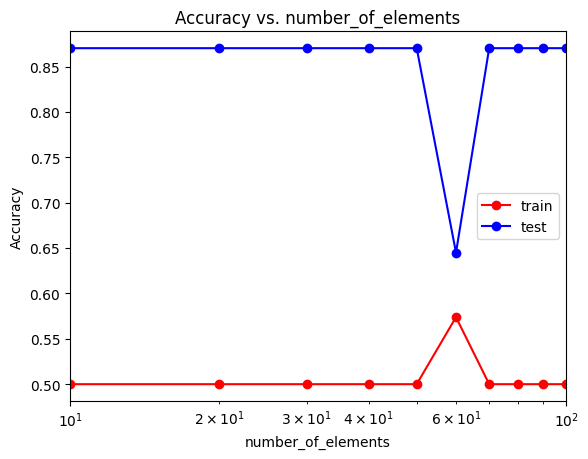

In [ ]:
plt.semilogx(num_elems_arr, min_train_accuracy, 'r-o', label = 'train')
plt.semilogx(num_elems_arr, min_test_accuracy, 'b-o', label = 'test')
plt.xlim([np.min(num_elems_arr), np.max(num_elems_arr)])
plt.title('Accuracy vs. number_of_elements')
plt.xlabel('number_of_elements')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
print(min_test_errors[5])
print(alpha_opts[5])

0.3550529678829662
[0.31622777]


Выводы: наименьшая ошибка, равная ~0.35 наблюдается при количестве нейронов, равным 60.

## **Заключение**

Можно сделать следующие выводы
* Был проведён ряд запусков нейронной сети с различным количеством нейронов и подбором параметра alpha;
* Наилучшие результаты были получены при использовании нейронной сети с одним скрытым слоем с 60 нейронами при параметре alpha = 3.16227766. Ошибка на тестовой выборке составила 23.1%;
* При использовании 2 слоёв нейронной сети самый лучший результат получился при использовании слоёв по 10 нейронов каждый. Ошибка на тестовой выборке составила 24.8%;
* При использовании алгоритма KNN в наилучшем случае удалось добиться ошибки в 26.6% на тестовой выборке. Таким образом, нейронная сеть дала результат лучше на 3.5%. 

Запустим ряд других классификаторов.

## Gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

err_train_best = 100500
err_test_best = 100500
y_predict_best = []

train_errors = []
test_errors = []


est_vals = [x for x in range(50,501,50)]

for i in est_vals:
    boost = GradientBoostingClassifier(n_estimators = i)
    boost.fit(x_train, y_train)

    y_test_predict = boost.predict(x_test)
    err_train = np.mean(y_train != boost.predict(x_train))
    err_test = np.mean(y_test != y_test_predict)
    if err_test < err_test_best:
        err_test_best = err_test
        err_train_best = err_train
        y_predict_best = y_test_predict
    
    train_errors.append(err_train)
    test_errors.append(err_test)
    print("n_estimators = ", i)
    print("err_train:", err_train)
    print("err_test:", err_test)
    print("---------")
print("best:", err_train_best, err_test_best)

n_estimators =  50
err_train: 0.3492849284928493
err_test: 0.36959811669749454
---------
n_estimators =  100
err_train: 0.32604510451045104
err_test: 0.3744745249705734
---------
n_estimators =  150
err_train: 0.30899339933993397
err_test: 0.3823776694131495
---------
n_estimators =  200
err_train: 0.2978547854785479
err_test: 0.3870859256768118
---------
n_estimators =  250
err_train: 0.2847909790979098
err_test: 0.3856566335967715
---------
n_estimators =  300
err_train: 0.27365236523652364
err_test: 0.38666554565327055
---------
n_estimators =  350
err_train: 0.25935093509350937
err_test: 0.3879266857238944
---------
n_estimators =  400
err_train: 0.24326182618261827
err_test: 0.3875063057003531
---------
n_estimators =  450
err_train: 0.23088558855885588
err_test: 0.3906171178745586
---------
n_estimators =  500
err_train: 0.2196094609460946
err_test: 0.38935597780393477
---------
best: 0.3492849284928493 0.36959811669749454


Text(0, 0.5, 'error')

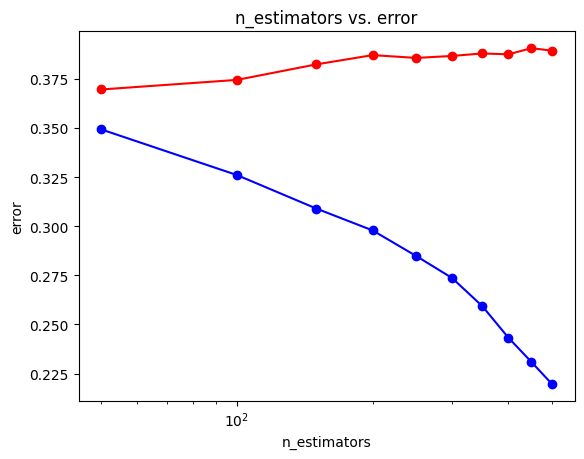

In [ ]:
plt.semilogx(est_vals, train_errors, 'b-o', label = 'train')
plt.semilogx(est_vals, test_errors, 'r-o', label = 'test')
plt.title('n_estimators vs. error')
plt.xlabel('n_estimators')
plt.ylabel('error')

In [ ]:
boost = GradientBoostingClassifier(n_estimators = 450)
boost.fit(x_train, y_train)

y_test_predict = boost.predict(x_test)
err_train = np.mean(y_train != boost.predict(x_train))
err_test = np.mean(y_test != y_test_predict)
print(confusion_matrix(y_test_predict, y_test))
print(classification_report(y_test, y_test_pred))

[[6291  590]
 [4059  954]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     10350
           1       0.00      0.00      0.00      1544

    accuracy                           0.87     11894
   macro avg       0.44      0.50      0.47     11894
weighted avg       0.76      0.87      0.81     11894



C:\Users\Nick\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nick\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nick\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Самый лучший результат для метода Gradient Boost по ошибке на тесте достигает 21.2%.

## Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

err_train_best = 100500
err_test_best = 100500
y_predict_best = []

train_errors = []
test_errors = []


est_vals = [x for x in range(25,201,25)]

for i in est_vals:
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(x_train, y_train)

    y_test_predict = rfc.predict(x_test)
    err_train = np.mean(y_train != rfc.predict(x_train))
    err_test  = np.mean(y_test  != y_test_predict)
    if err_test < err_test_best:
        err_test_best = err_test
        err_train_best = err_train
        y_predict_best = y_test_predict
    
    train_errors.append(err_train)
    test_errors.append(err_test)
    print("n_estimators = ", i)
    print("err_train:", err_train)
    print("err_test:", err_test)
    print("---------")
print("best:", err_train_best, err_test_best)

n_estimators =  25
err_train: 0.008113311331133114
err_test: 0.40684378678325206
---------
n_estimators =  50
err_train: 0.006875687568756876
err_test: 0.3844795695308559
---------
n_estimators =  75
err_train: 0.006875687568756876
err_test: 0.40053808643013283
---------
n_estimators =  100
err_train: 0.006875687568756876
err_test: 0.39002858584160083
---------
n_estimators =  125
err_train: 0.006875687568756876
err_test: 0.39650243820413655
---------
n_estimators =  150
err_train: 0.006875687568756876
err_test: 0.38666554565327055
---------
n_estimators =  175
err_train: 0.006875687568756876
err_test: 0.39675466621826133
---------
n_estimators =  200
err_train: 0.006875687568756876
err_test: 0.3921304859593072
---------
best: 0.006875687568756876 0.3844795695308559


Text(0, 0.5, 'error')

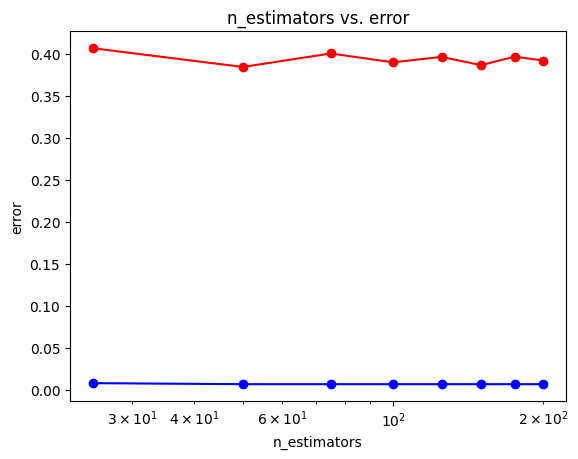

In [ ]:
plt.semilogx(est_vals, train_errors, 'b-o', label = 'train')
plt.semilogx(est_vals, test_errors, 'r-o', label = 'test')
plt.title('n_estimators vs. error')
plt.xlabel('n_estimators')
plt.ylabel('error')

In [ ]:
rfc = RandomForestClassifier(n_estimators=175)
rfc.fit(x_train, y_train)

y_test_predict = rfc.predict(x_test)
err_train = np.mean(y_train != rfc.predict(x_train))
err_test  = np.mean(y_test  != y_test_predict)

print(confusion_matrix(y_test_predict, y_test))
print(classification_report(y_test, y_test_pred))

[[6194  570]
 [4156  974]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     10350
           1       0.00      0.00      0.00      1544

    accuracy                           0.87     11894
   macro avg       0.44      0.50      0.47     11894
weighted avg       0.76      0.87      0.81     11894



C:\Users\Nick\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nick\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nick\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Самый лучший результат для Random forest classifier - 18.3% ошибки на тестовой выборке.

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier


err_train_best = 100500
err_test_best = 100500
y_predict_best = []

train_errors = []
test_errors = []


max_depths = [x for x in range(2, 16, 2)]

for i in max_depths:
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(x_train,y_train)

    y_test_predict = dtc.predict(x_test)
    err_train = np.mean(y_train != dtc.predict(x_train))
    err_test = np.mean(y_test != y_test_predict)
    if err_test < err_test_best:
        err_test_best = err_test
        err_train_best = err_train
        y_predict_best = y_test_predict
    
    train_errors.append(err_train)
    test_errors.append(err_test)
    print("max_depth = ", i)
    print("err_train:", err_train)
    print("err_test:", err_test)
    print("---------")
print("best:", err_train_best, err_test_best)

max_depth =  2
err_train: 0.42615511551155116
err_test: 0.21052631578947367
---------
max_depth =  4
err_train: 0.38875137513751373
err_test: 0.43433664032285185
---------
max_depth =  6
err_train: 0.3642739273927393
err_test: 0.4306372961156886
---------
max_depth =  8
err_train: 0.32123212321232125
err_test: 0.42399529174373635
---------
max_depth =  10
err_train: 0.2665016501650165
err_test: 0.40179922650075667
---------
max_depth =  12
err_train: 0.20255775577557755
err_test: 0.41995964351774
---------
max_depth =  14
err_train: 0.13916391639163916
err_test: 0.41356986715991256
---------
best: 0.42615511551155116 0.21052631578947367


Text(0, 0.5, 'error')

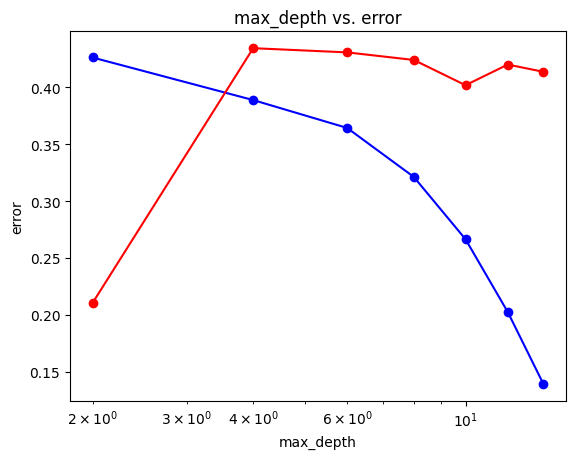

In [ ]:
plt.semilogx(max_depths, train_errors, 'b-o', label = 'train')
plt.semilogx(max_depths, test_errors, 'r-o', label = 'test')
plt.title('max_depth vs. error')
plt.xlabel('max_depth')
plt.ylabel('error')

In [ ]:
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

[[6116 4234]
 [ 685  859]]
              precision    recall  f1-score   support

           0       0.90      0.59      0.71     10350
           1       0.17      0.56      0.26      1544

    accuracy                           0.59     11894
   macro avg       0.53      0.57      0.49     11894
weighted avg       0.80      0.59      0.65     11894



Лучший результат для данного метода - 24.1% на тестовой выборке.

# Логистическая регрессия

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver="liblinear")
clf.fit(x_train, y_train)

y_test_predict = clf.predict(x_test)
y_train_predict = clf.predict(x_train)

err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

print(f"{err_train=}")
print(f"{err_test=}", end="\n\n")

print(confusion_matrix(y_test_predict, y_test))
print(classification_report(y_test, y_test_predict))

err_train=0.3928767876787679
err_test=0.3568185639818396

[[6780  674]
 [3570  870]]
              precision    recall  f1-score   support

           0       0.91      0.66      0.76     10350
           1       0.20      0.56      0.29      1544

    accuracy                           0.64     11894
   macro avg       0.55      0.61      0.53     11894
weighted avg       0.82      0.64      0.70     11894



## Общие выводы

* Самый лучший результат показал метод Random forest classifier с ошибкой в 18.3%.
* Самый худший результат показал метод KNN с ошибкой на тестовой выборке в 26.6%.
* Decision Tree Classifier показал результат в 24.1% ошибки на тестовой выборке, Gradient Boosting - 21.2%
* Методы oversampling и undersampling не подходят для борьбы с несбалансированностью классов в данном случае.